In [1]:
import pandas as pd

In [2]:
import  numpy as np

In [14]:
from matplotlib import pyplot as plt


In [7]:
import requests
import pandas as pd

# Download the data from the provided link
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
response = requests.get(url)
data = response.json()

# Extract relevant data from the JSON and convert it into a list of dictionaries
pokemon_data = []
for pokemon in data["pokemon"]:
    pokemon_info = {
        "id": pokemon["id"],
        "num": pokemon["num"],
        "name": pokemon["name"],
        "img": pokemon["img"],
        "type": ", ".join(pokemon["type"]),
        "height": pokemon["height"],
        "weight": pokemon["weight"],
        "candy": pokemon.get("candy", ""),
        "candy_count": pokemon.get("candy_count", ""),
        "egg": pokemon.get("egg", ""),
        "spawn_chance": pokemon.get("spawn_chance", ""),
        "avg_spawns": pokemon.get("avg_spawns", ""),
        "spawn_time": pokemon.get("spawn_time", ""),
        "weakness": ", ".join(pokemon.get("weaknesses", [])),
        "next_evolution": ", ".join([evolution.get("name", "") for evolution in pokemon.get("next_evolution", [])]),
        "prev_evolution": ", ".join([evolution.get("name", "") for evolution in pokemon.get("prev_evolution", [])])
    }
    pokemon_data.append(pokemon_info)

# Create a DataFrame from the extracted data
df = pd.DataFrame(pokemon_data)

# Save the DataFrame to an Excel file
output_file = "pokemon1_data.xlsx"
df.to_excel(output_file, index=False)

print("Data saved to", output_file)


Data saved to pokemon1_data.xlsx


In [11]:
df=pd.read_excel('pokemon1_data.xlsx')

In [12]:
df

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weakness,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,"Fire, Ice, Flying, Psychic","Ivysaur, Venusaur",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"Fire, Ice, Flying, Psychic",Venusaur,Bulbasaur
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,"Fire, Ice, Flying, Psychic",NaN,"Bulbasaur, Ivysaur"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,"Water, Ground, Rock","Charmeleon, Charizard",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,"Water, Ground, Rock",Charizard,Charmander
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"Ice, Dragon, Fairy","Dragonair, Dragonite",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,"Ice, Dragon, Fairy",Dragonite,Dratini
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"Dragon, Flying",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,"Ice, Rock, Dragon, Fairy",NaN,"Dratini, Dragonair"
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,"Bug, Ghost, Dark",NaN,NaN


In [16]:
# 3. Get all Pokemons that have no multipliers at all
pokemon_no_multipliers = df[df['spawn_time'] == '']
print("\nPokemons with no multipliers:")
print(pokemon_no_multipliers)


Pokemons with no multipliers:
Empty DataFrame
Columns: [id, num, name, img, type, height, weight, candy, candy_count, egg, spawn_chance, avg_spawns, spawn_time, weakness, next_evolution, prev_evolution]
Index: []


In [17]:
# 4. Get all Pokemons that do not have more than 2 evolutions
evolution_threshold = 2
pokemon_few_evolutions = df[df['next_evolution'].str.count(',') < evolution_threshold]
print("\nPokemons with no more than", evolution_threshold, "evolutions:")
print(pokemon_few_evolutions)


Pokemons with no more than 2 evolutions:
      id  num        name                                               img  \
0      1    1   Bulbasaur  http://www.serebii.net/pokemongo/pokemon/001.png   
1      2    2     Ivysaur  http://www.serebii.net/pokemongo/pokemon/002.png   
3      4    4  Charmander  http://www.serebii.net/pokemongo/pokemon/004.png   
4      5    5  Charmeleon  http://www.serebii.net/pokemongo/pokemon/005.png   
6      7    7    Squirtle  http://www.serebii.net/pokemongo/pokemon/007.png   
..   ...  ...         ...                                               ...   
128  129  129    Magikarp  http://www.serebii.net/pokemongo/pokemon/129.png   
137  138  138     Omanyte  http://www.serebii.net/pokemongo/pokemon/138.png   
139  140  140      Kabuto  http://www.serebii.net/pokemongo/pokemon/140.png   
146  147  147     Dratini  http://www.serebii.net/pokemongo/pokemon/147.png   
147  148  148   Dragonair  http://www.serebii.net/pokemongo/pokemon/148.png   

         

In [21]:
# 5. Get all Pokemons whose spawn time is less than 300 seconds
spawn_time_threshold = 300
df['spawn_time_minutes'] = df['spawn_time'].str.split(':').str[0].fillna(0).astype(int)
df['spawn_time_seconds'] = df['spawn_time'].str.split(':').str[1].fillna(0).astype(int)
pokemon_low_spawn_time = df[(df['spawn_time_minutes'] * 60 + df['spawn_time_seconds']) < spawn_time_threshold]
print("\nPokemons with spawn time less than", spawn_time_threshold, "seconds:")
print(pokemon_low_spawn_time)


Pokemons with spawn time less than 300 seconds:
      id  num       name                                               img  \
6      7    7   Squirtle  http://www.serebii.net/pokemongo/pokemon/007.png   
8      9    9  Blastoise  http://www.serebii.net/pokemongo/pokemon/009.png   
10    11   11    Metapod  http://www.serebii.net/pokemongo/pokemon/011.png   
12    13   13     Weedle  http://www.serebii.net/pokemongo/pokemon/013.png   
13    14   14     Kakuna  http://www.serebii.net/pokemongo/pokemon/014.png   
..   ...  ...        ...                                               ...   
143  144  144   Articuno  http://www.serebii.net/pokemongo/pokemon/144.png   
144  145  145     Zapdos  http://www.serebii.net/pokemongo/pokemon/145.png   
145  146  146    Moltres  http://www.serebii.net/pokemongo/pokemon/146.png   
149  150  150     Mewtwo  http://www.serebii.net/pokemongo/pokemon/150.png   
150  151  151        Mew  http://www.serebii.net/pokemongo/pokemon/151.png   

              

In [19]:
# 6. Get all Pokemon who have more than two types of capabilities
pokemon_multiple_types = df[df['type'].str.count(',') > 1]
print("\nPokemons with more than two types of capabilities:")
print(pokemon_multiple_types)


Pokemons with more than two types of capabilities:
Empty DataFrame
Columns: [id, num, name, img, type, height, weight, candy, candy_count, egg, spawn_chance, avg_spawns, spawn_time, weakness, next_evolution, prev_evolution]
Index: []


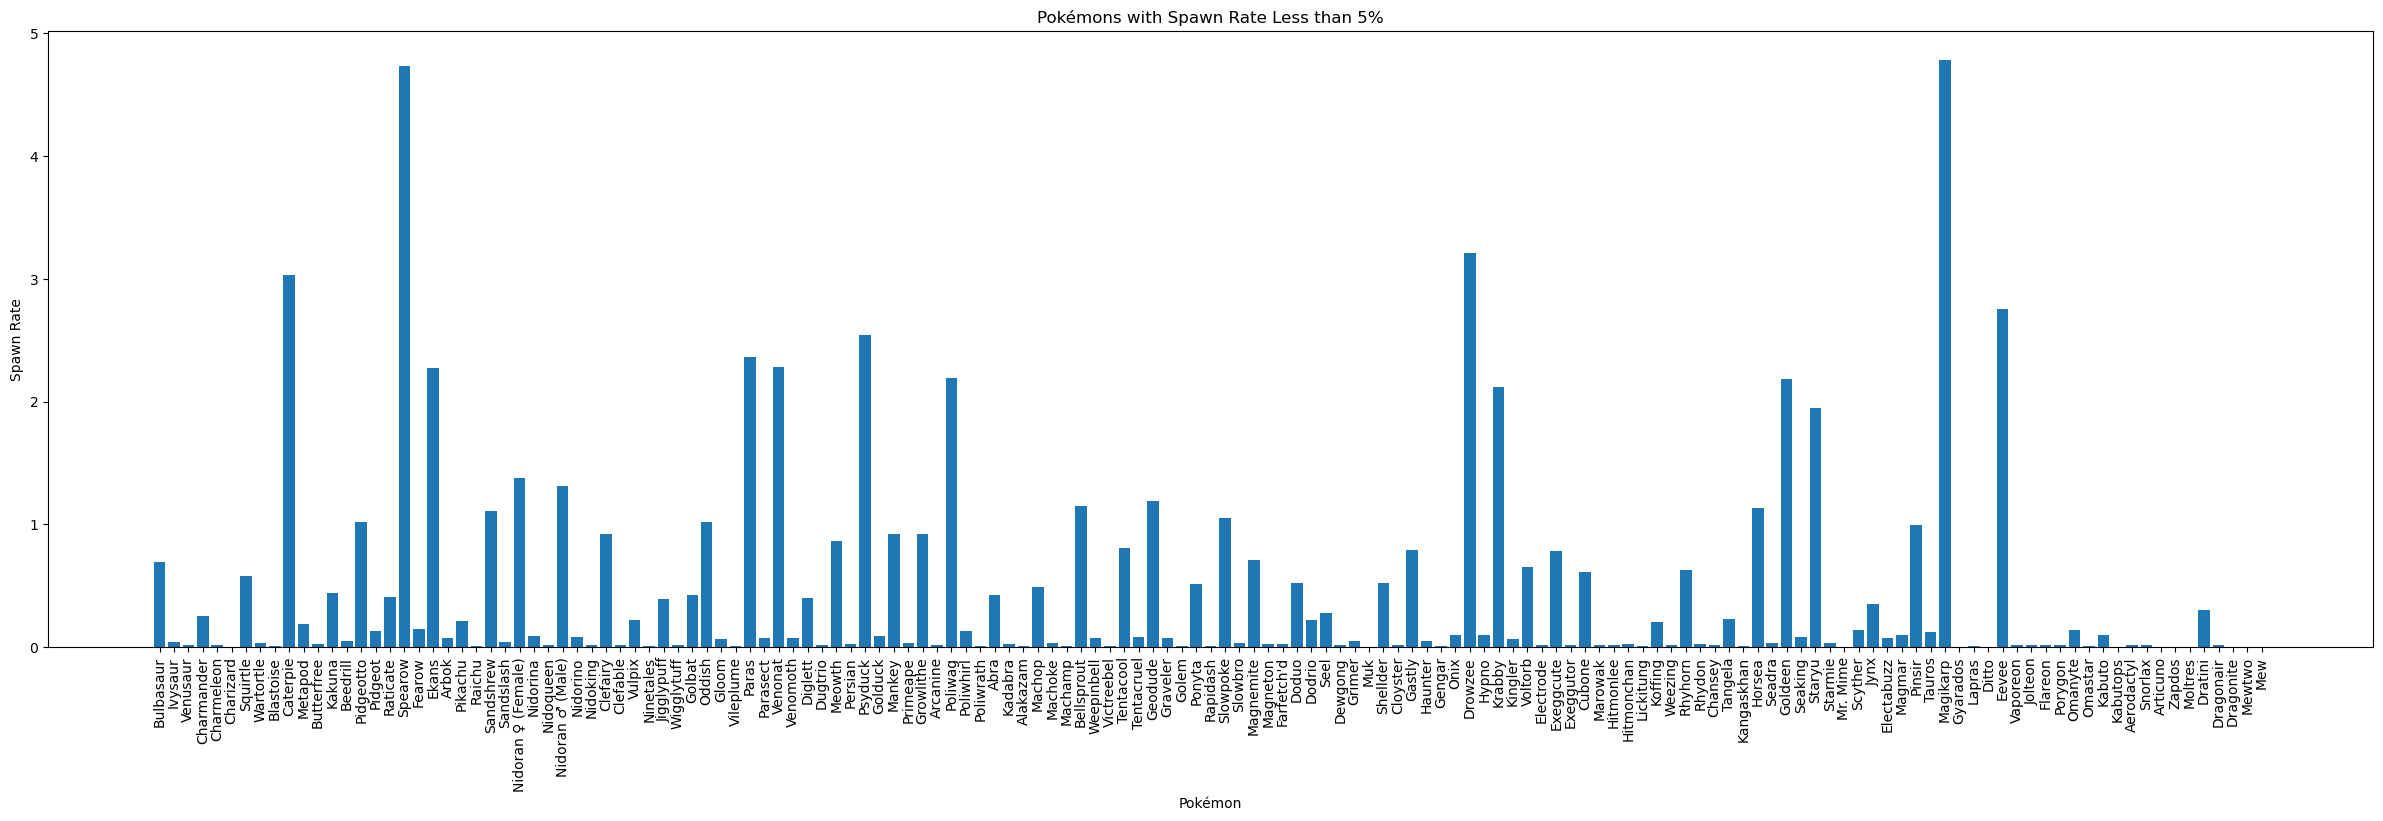

In [29]:
# Filter Pokemons with spawn rate less than 5%
spawn_rate_threshold = 5
pokemon_low_spawn_rate_percentage = df[df['spawn_chance'] < spawn_rate_threshold]

# Bar plot for Pokemons whose spawn rate is less than 5%
plt.figure(figsize=(30, 8))
plt.bar(pokemon_low_spawn_rate_percentage['name'], pokemon_low_spawn_rate_percentage['spawn_chance'])
plt.xlabel("Pokémon")
plt.ylabel("Spawn Rate")
plt.title("Pokémons with Spawn Rate Less than 5%")
plt.xticks(rotation=90)
plt.show()


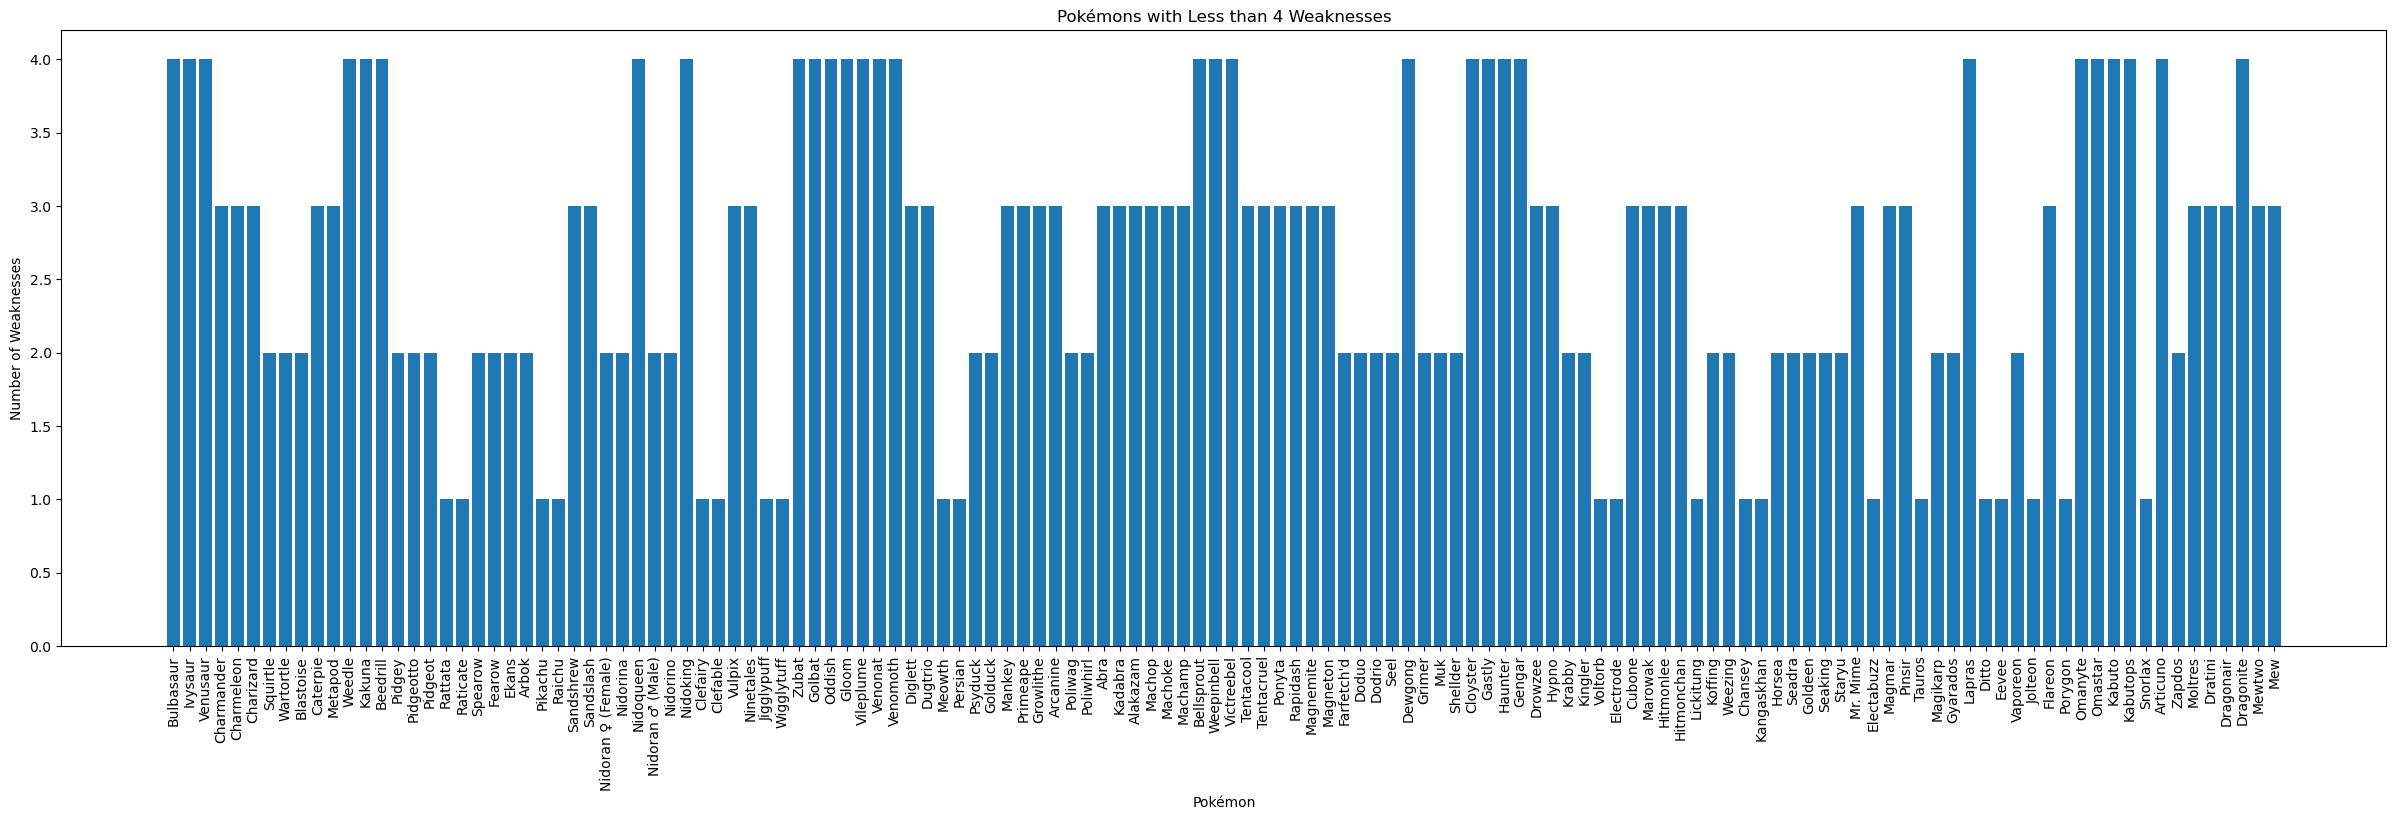

In [32]:
# Filter Pokemons with less than 4 weaknesses
max_weaknesses = 4
pokemon_few_weaknesses = df[df['weakness'].str.count(',') < max_weaknesses]

# Bar plot for Pokemons that have less than 4 weaknesses
plt.figure(figsize=(30, 8))
plt.bar(pokemon_few_weaknesses['name'], pokemon_few_weaknesses['weakness'].str.count(',') + 1)
plt.xlabel("Pokémon")
plt.ylabel("Number of Weaknesses")
plt.title("Pokémons with Less than 4 Weaknesses")
plt.xticks(rotation=90)
plt.show()


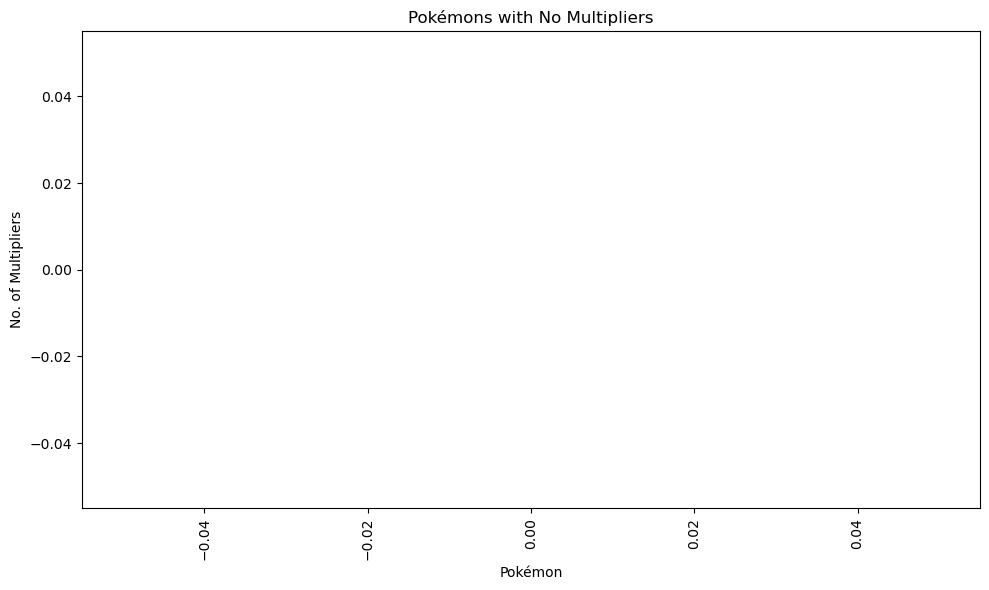

In [34]:
# Bar plot for Pokemons that have no multipliers at all
plt.figure(figsize=(10, 6))
plt.bar(pokemon_no_multipliers['name'], 0)
plt.xlabel("Pokémon")
plt.ylabel("No. of Multipliers")
plt.title("Pokémons with No Multipliers")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


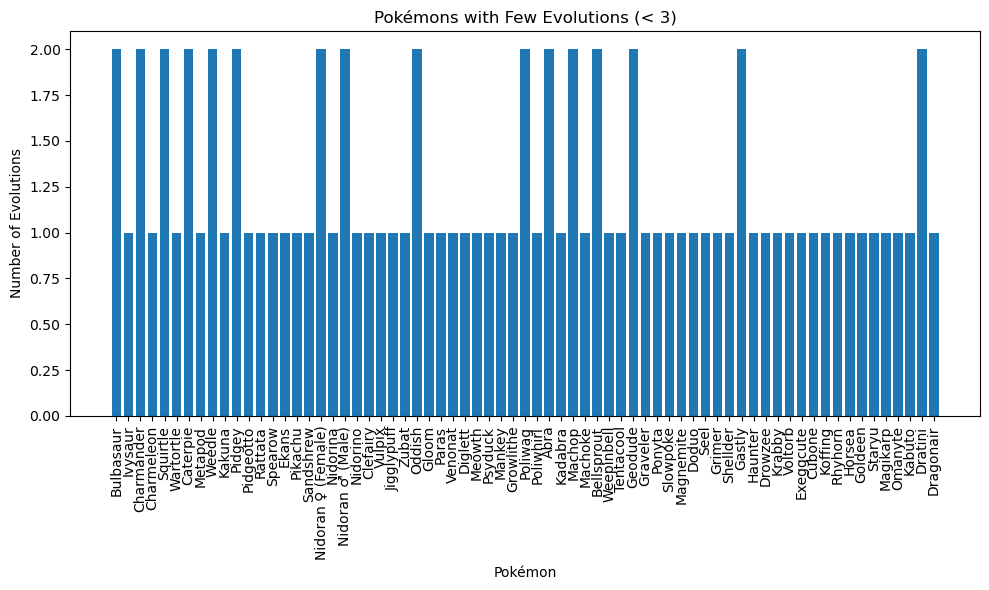

In [35]:
# Bar plot for Pokemons that do not have more than 2 evolutions
plt.figure(figsize=(10, 6))
plt.bar(pokemon_few_evolutions['name'], pokemon_few_evolutions['next_evolution'].str.count(',') + 1)
plt.xlabel("Pokémon")
plt.ylabel("Number of Evolutions")
plt.title("Pokémons with Few Evolutions (< 3)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

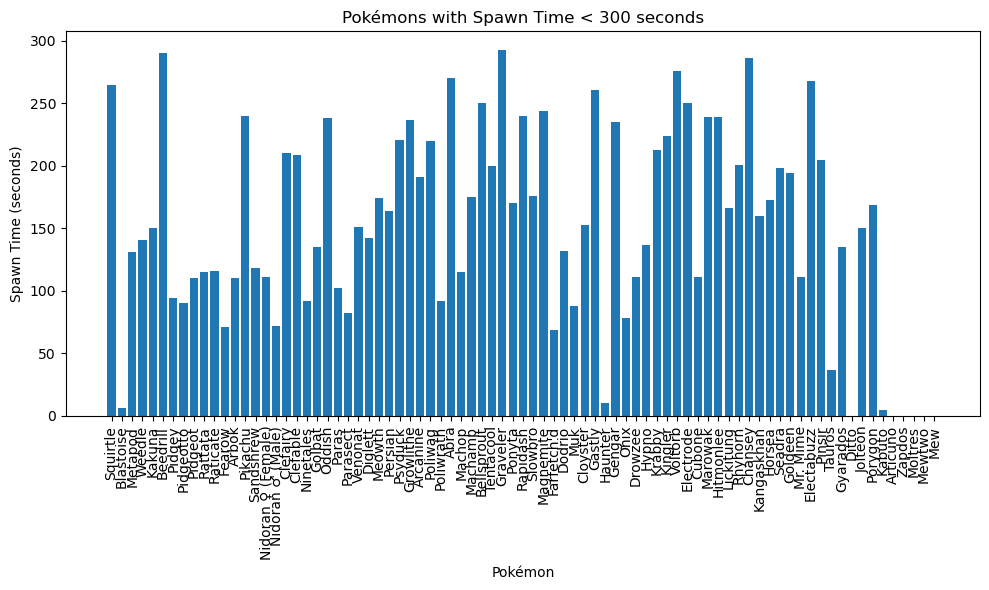

In [36]:
# Bar plot for Pokemons whose spawn time is less than 300 seconds
plt.figure(figsize=(10, 6))
plt.bar(pokemon_low_spawn_time['name'], pokemon_low_spawn_time['spawn_time_minutes'] * 60 + pokemon_low_spawn_time['spawn_time_seconds'])
plt.xlabel("Pokémon")
plt.ylabel("Spawn Time (seconds)")
plt.title("Pokémons with Spawn Time < 300 seconds")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

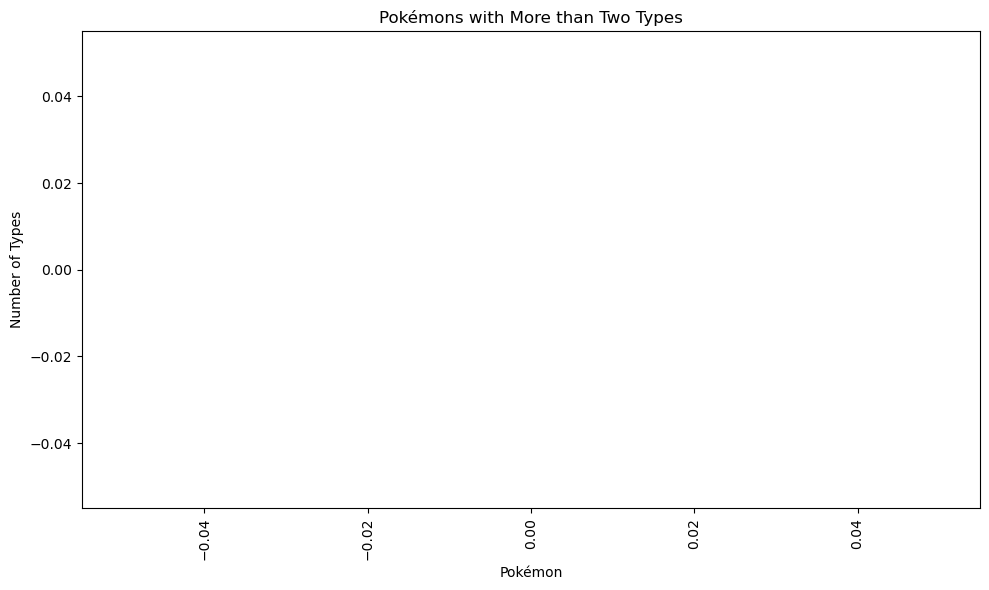

In [37]:
# Bar plot for Pokemons who have more than two types of capabilities
plt.figure(figsize=(10, 6))
plt.bar(pokemon_multiple_types['name'], pokemon_multiple_types['type'].str.count(',') + 1)
plt.xlabel("Pokémon")
plt.ylabel("Number of Types")
plt.title("Pokémons with More than Two Types")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()